In [3]:
import pandas as pd
# Use pd.read_csv to read the dataset. (The dataset is stored in the current directory so that it can be read directly.)
data=pd.read_csv('./ai4i2020.csv')

In [4]:
import warnings
warnings.filterwarnings('ignore')

# shape to view the length and width of data in the matrix format.
data.shape

(10000, 14)

In [5]:
# head to view the first 10 rows of data.
data.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


<AxesSubplot: >

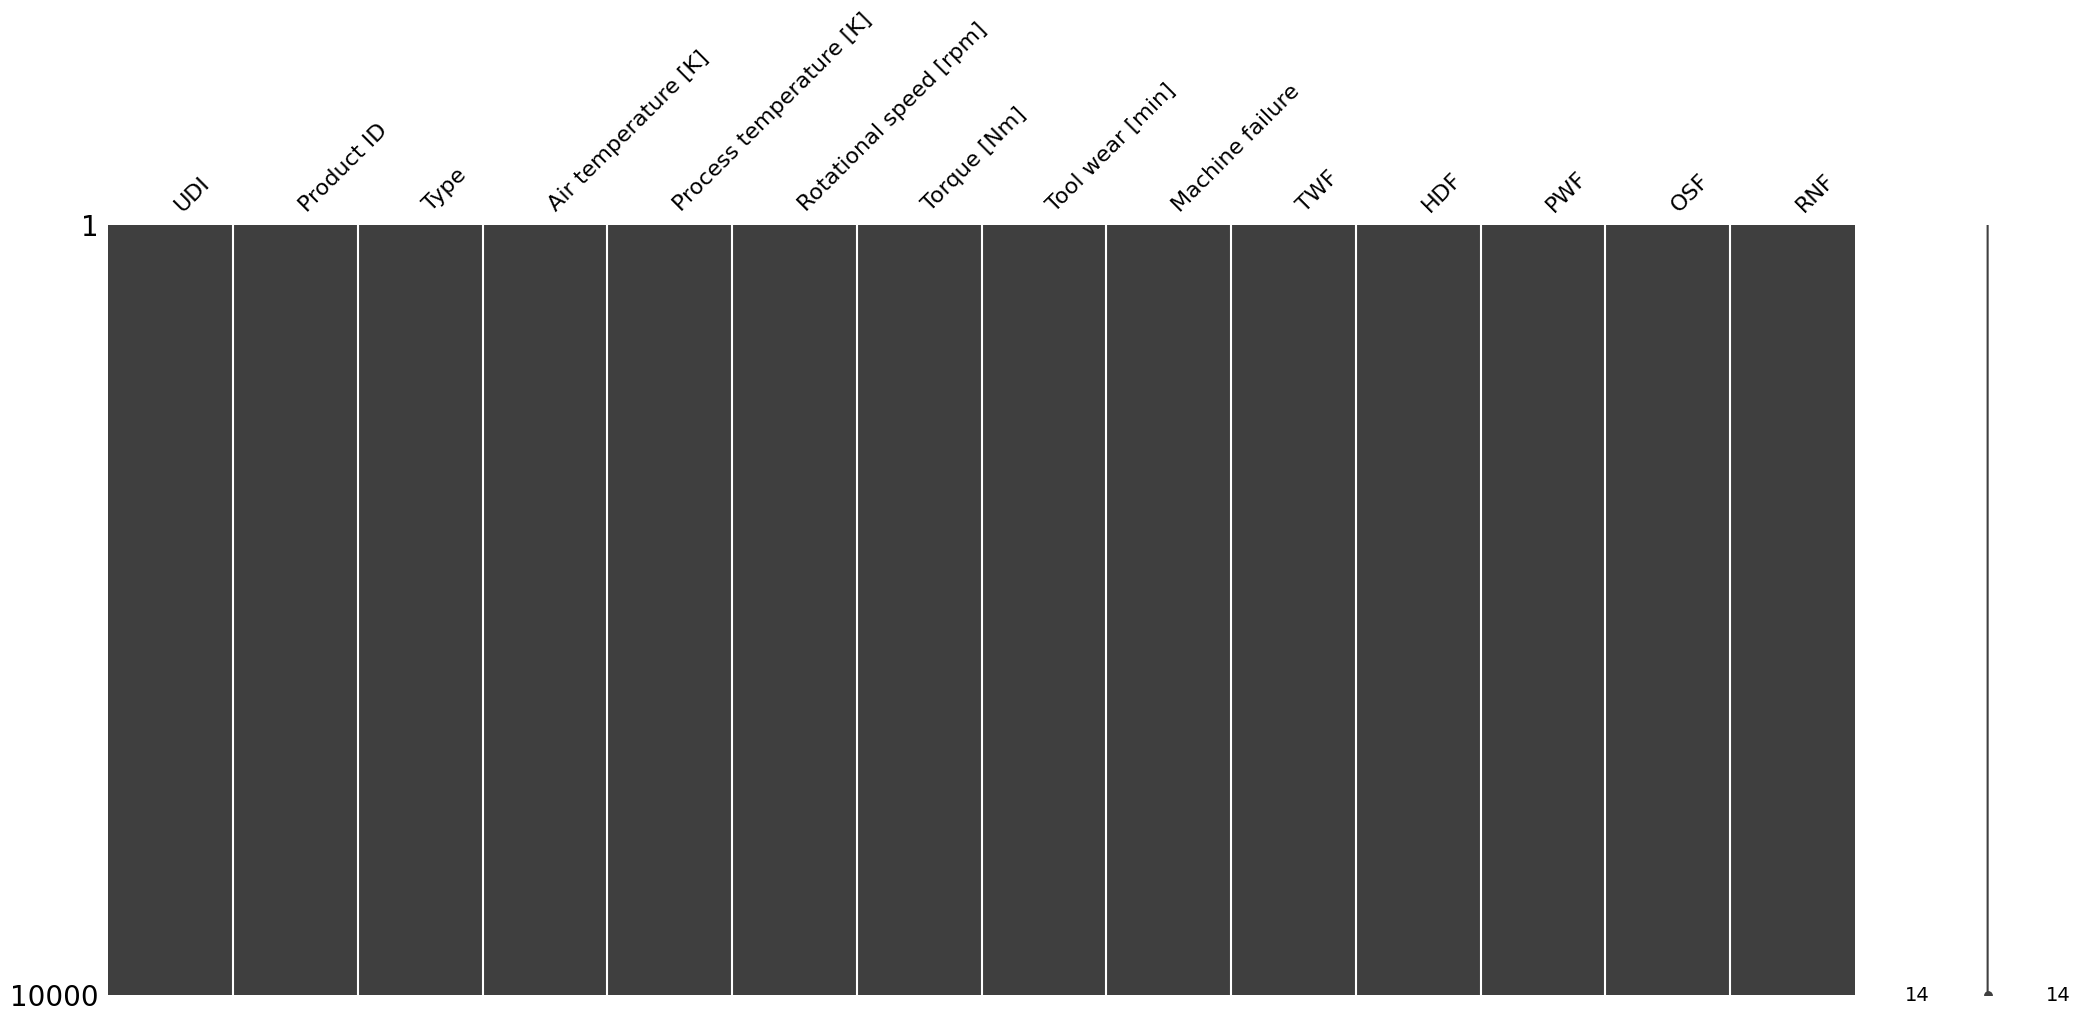

In [7]:
# Check the data missing status in a visualized manner.
# The third-party library missingno is used.
import missingno
missingno.matrix(data)

In [8]:
# Remove Target (Machine failure) which cannot be used as input into the model.
# Remove 'UDI', 'Product ID', 'TWF','HDF','PWF','OSF','RNF' which cannot be used as input into the model.
X=data.drop(['UDI', 'Product ID','TWF','HDF','PWF','OSF','RNF','Machine failure'],axis=1)
y=data['Machine failure']

In [9]:
X.head(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9
5,M,298.1,308.6,1425,41.9,11
6,L,298.1,308.6,1558,42.4,14
7,L,298.1,308.6,1527,40.2,16
8,M,298.3,308.7,1667,28.6,18
9,M,298.5,309.0,1741,28.0,21


In [10]:
# Convert Categorical Variable to Numeric Variable
X['Type'].replace(['L', 'M', 'H'],
                        [0, 1, 2], inplace=True)

In [11]:
X.head(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,298.1,308.6,1551,42.8,0
1,0,298.2,308.7,1408,46.3,3
2,0,298.1,308.5,1498,49.4,5
3,0,298.2,308.6,1433,39.5,7
4,0,298.2,308.7,1408,40.0,9
5,1,298.1,308.6,1425,41.9,11
6,0,298.1,308.6,1558,42.4,14
7,0,298.1,308.6,1527,40.2,16
8,1,298.3,308.7,1667,28.6,18
9,1,298.5,309.0,1741,28.0,21


In [12]:
# Spliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [31]:
X_test

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
9355,0,298.3,308.9,1708,28.0,42
1977,1,298.1,307.7,1633,30.7,145
8405,1,298.4,309.5,1484,41.7,119
5319,1,303.5,312.7,1402,47.0,23
540,0,297.4,309.4,1473,45.5,94
...,...,...,...,...,...,...
4442,0,302.5,310.2,1563,34.8,150
3702,0,302.0,311.2,1434,44.9,15
7032,0,300.7,310.9,1723,31.0,73
935,1,295.5,306.0,1641,36.6,21


In [13]:
# After the dataset is split, standardize the data.
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler().fit(X)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

In [15]:
from collections import Counter
Counter(y_train)
# Use collections in the standard library to query the results.
# Import the third-party library imblearn.
from imblearn import over_sampling
fixtool=over_sampling.SMOTE()
X_train_fix,y_train_fix=fixtool.fit_resample(X_train_std,y_train)
# X_train_fix and y_train_fix are the corrected data.
# Next, check the number of samples.
Counter(y_train_fix)
# Check the corrected y_train_fix instead of the original y_train.

Counter({0: 7729, 1: 7729})

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Declare the logistic regression algorithm and set max_iter (the maximum number of training times) to 500.
# Perform judgment based on the cross verification thinking to help split the dataset.
# cv=5 indicates that the dataset is split into five equal parts.
lr_model = LogisticRegression(solver='liblinear',max_iter=500)
cv_scores = cross_val_score(lr_model,X_train_fix,y_train_fix,scoring='roc_auc',cv=5)
# Apply grid search to find the optimal parameters through traversal.
# Import the grid search module.

In [17]:
from sklearn.model_selection import GridSearchCV
# C indicates the regularization coefficient.
c_range=[0.001,0.01,0.1,1.0]
# solvers indicates the optimization method.
solvers=['liblinear','lbfgs','newton-cg','sag']
# Combine the regularization coefficient with the optimization method using the dictionary method.
tuned_parameters=dict(solver=solvers,C=c_range)
# Declare the logistic regression algorithm.
lr_model=LogisticRegression(solver='liblinear',max_iter=500)
# Declare the grid search algorithm and describe the cross verification method.
grid=GridSearchCV(lr_model,tuned_parameters,cv=5,scoring='roc_auc')
# Perform training.
grid.fit(X_train_fix,y_train_fix)
# Check the optimal accuracy.
print(grid.best_score_)
# Check which parameters are optimal.
print(grid.best_params_)

0.9195307605576344
{'C': 1.0, 'solver': 'newton-cg'}


In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
# Use the obtained optimal parameters for modeling.
lr_model=LogisticRegression(C=grid.best_params_['C'],solver=grid.best_params_['solver'],max_iter=500
)
lr_model.fit(X_train_fix,y_train_fix)
# Construct a function to return the verification result.
def scoree(model,X,y,name=None):
  y_predict=model.predict(X)
  # Use the predict parameter to predict the result.
  if name:
    print(name,':')
  print('accuracy score is:{}'.format(accuracy_score(y,y_predict)))
  print('precision score is:{}'.format(precision_score(y,y_predict)))
  print('recall score is:{}'.format(recall_score(y,y_predict)))
  print('aic:{}'.format(roc_auc_score(y,y_predict)))
# Output the performance data of the training set.
scoree(lr_model,X_train_fix,y_train_fix)
# Output the performance data of the test set.
scoree(lr_model,X_test_std,y_test)

accuracy score is:0.8387242851597878
precision score is:0.8370236869207003
recall score is:0.8412472506145685
aic:0.8387242851597878
accuracy score is:0.8315
precision score is:0.13550135501355012
recall score is:0.7352941176470589
aic:0.785090123005724


In [19]:
# Import the joblib library
import joblib
# The dump function is used to save models. Enter the trained model and the model name into the dump function to save the model.
# The model file must be suffixed with .pkl.
joblib.dump(lr_model,'ai4i2020.pkl')
# Load the saved model again.
loadmodel=joblib.load('ai4i2020.pkl')
# After the model is loaded, use the model for prediction directly.
loadmodel.predict(X_test_std)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)